# Project 1: Trading with Momentum

In this project, you will learn to implement a trading strategy on your own, and test to see if it has the potential to be profitable. You will be supplied with a universe of stocks and time range. You will also be provided with a textual description of how to generate a trading signal based on a momentum indicator. You will then compute the signal for the time range given and apply it to the dataset to produce projected returns. Finally, you will perform a statistical test on the mean of the returns to conclude if there is alpha in the signal.

Complete the following tasks by implementing sections marked with a `TODO` comment and answering any questions.
## Install Packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 15.0MB 44kB/s  eta 0:00:01   32% |██████████▍                     | 4.9MB 26.9MB/s eta 0:00:01    41% |█████████████▏                  | 6.2MB 29.9MB/s eta 0:00:01    75% |████████████████████████▎       | 11.4MB 25.5MB/s eta 0:00:01
    100% |████████████████████████████████| 17.0MB 38kB/s  eta 0:00:01   30% |█████████▋                      | 5.1MB 24.5MB/s eta 0:00:01    59% |███████████████████             | 10.1MB 27.4MB/s eta 0:00:01    83% |██████████████████████████▋     | 14.1MB 31.3MB/s eta 0:00:01
    100% |████████████████████████████████| 26.2MB 24kB/s  eta 0:00:01  2% |▊                               | 563kB 15.2MB/s eta 0:00:02    5% |█▊                              | 1.4MB 17.3MB/s eta 0:00:02    35% |███████████▎                    | 9.2MB 26.0MB/s eta 0:00:01    67% |█████████████████████▊          | 17.8MB 25.2MB/s eta 0:00:01    81% |██████████████████████████      | 21.3MB 28.5MB/s eta 0:00:01    90% |█████████████████████

  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /root/.cache/pip/wheels/98/54/81/dd92d5b0858fac680cd7bdb8800eb26c001dd9f5dc8b1bc0ba
  Running setup.py bdist_wheel for inflection ... done
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built plotly inflection
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
  Found existing installation: plotly 2.0.15
    Uninstalling plotly-2.0.15:
      Successfully uninstalled plotly-2.0.15
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1
  Found existing installation:

## Market Data
The data source we'll be using is the [Wiki End of Day data](https://www.quandl.com/databases/WIKIP) hosted at [Quandl](https://www.quandl.com). This contains data for many stocks, but we'll just be looking at the S&P 500 stocks. We'll also make things a little easier to solve by narrowing our range of time from 2007-06-30 to 2017-09-30.
### Set API Key
Set the `quandl.ApiConfig.api_key ` variable to your Quandl api key. You can find your Quandl api key [here](https://www.quandl.com/account/api).

In [2]:
import quandl

# TODO: Add your Quandl API Key
quandl.ApiConfig.api_key  = 'r4mgK1hxD11kLoFtRsso'

### Download Data

In [3]:
import os
import helper

snp500_file_path = 'data/tickers_SnP500.txt'
wiki_file_path = 'data/WIKI_PRICES.csv'
start_date, end_date = '2013-07-01', '2017-06-30'
use_columns = ['date', 'ticker', 'adj_open', 'adj_close', 'adj_high', 'adj_low']
tickers = []

if not os.path.exists(wiki_file_path):
    with open(snp500_file_path) as f:
        tickers = f.read().split()
    
    print('Downloading data...')
    helper.download_quandl_dataset('WIKI', 'PRICES', wiki_file_path, use_columns, tickers, start_date, end_date)
    print('Data downloaded')
else:
    print('Data already downloaded')

Data already downloaded


### Import libraries and tests
Import any required libraries here, e.g. NumPy, Pandas, Matplotlib, etc. Also import unit tests to verify that your implementations are correct.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

from tests import tests

The functions you implement will be checked against unit tests for correctness. These tests make basic checks for any major problems with your implementation. It doesn't guarantee you have the correct solution, so make sure to read the instructions carefully.

### Load data

In [5]:
df = pd.read_csv(wiki_file_path, parse_dates=['date'], index_col=False)
print("Loaded dataframe with {} rows and {} columns".format(len(df), len(df.columns)))
df.head()

Loaded dataframe with 492531 rows and 6 columns


,date,ticker,adj_open,adj_close,adj_high,adj_low
0,2013-07-01,A,29.829307,30.203472,30.328194,29.732301
1,2013-07-02,A,30.141111,29.857023,30.411342,29.760017
2,2013-07-03,A,29.669940,29.912454,30.113395,29.600650
3,2013-07-05,A,30.113395,30.646927,30.691966,30.071821
4,2013-07-08,A,30.750862,30.737004,30.951803,30.570709


### Plot data

Verify that the data has been loaded correctly by plotting a sample. The `plot_data()` function does not have any associated tests; check visually to ensure that the plot produced is clear, unambiguous, and shows reasonable values.

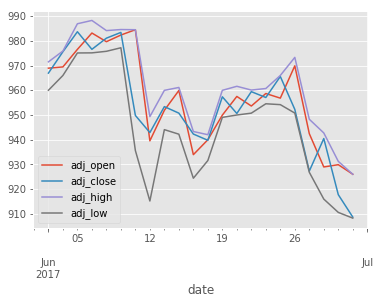

In [6]:
def plot_data(df, start_date, end_date, ticker, column='adj_close'):
    """
    Plot stock data for desired ticker and date range.
    
    Parameters
    ----------
    df : DataFrame
        Stock prices with dates and ticker symbols
    start_date : str
        Start of date range to plot
    end_date : str
        End of date range to plot
    ticker : str
        Which stock to plot
    column : str
        Which column contains price data
    """
    # TODO: Plot stock prices (default: 'adj_close' column)
    # Note: Your plot should be labeled, and the X-axis should be dates
    df = df.set_index('date')
    df = df.loc[start_date:end_date]
    df = df[df['ticker'] == ticker]
    df.plot()
    plt.show()

plot_data(df, start_date='2017-06-01', end_date='2017-06-30', ticker='GOOG')

## Resample Adjusted Prices

The trading signal you'll develop in this project need not be based on daily prices, for instance, you can use month-end prices to perform trading once a month. To do this, you must first resample the daily adjusted closing prices into monthly buckets, and select the last observation of each month.

Define a function `resample_prices()` that takes a dataframe, a sampling frequency (default: `freq='M'`, i.e. monthly), and a choice of which column to extract (default: `column='adj_close'`). For each ticker (stock symbol), it should pick the indicated column value at the end of each sampling period (e.g. the last day of every month), and return a dataframe object with columns named `['ticker', 'date', 'price']`.

Note:
- If you use [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), it may produce a series or dataframe with a multi-level index. Consequently, you may have to call `.reset_index()` on the result before returning.
- Consider using [`pandas.Grouper`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html) for easily resampling at the specified frequency.
- Don't forget to rename the price column to `'price'`.

In [ ]:
def resample_prices(df, freq='M', column='adj_close'):
    """
    Resample prices for each ticker at specified frequency.
    
    Parameters
    ----------
    df : DataFrame
        Stock prices with dates and ticker symbols
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    column : str
        Which column contains price data
    
    Returns
    -------
    df_resampled : DataFrame
        Resampled stock prices
        It contains the columns 'ticker', 'date', and 'price'
    """
    # TODO: Return the last price of each ticker (stock) from each time bucket
    pass

tests.test_resample_prices(resample_prices)

In [ ]:
df_resampled = resample_prices(df)
df_resampled.head()

## Compute Momentum Indicator

Compute log returns ($r_t$) from prices ($x_t$) as your primary momentum indicator:

$$r_t = log_e(x_t) - log_e(x_{t-1})$$

Implement the function `compute_log_returns()` below, such that it accepts a dataframe (like one returned by `resample_prices()`), and produces a similar dataframe with an additional column named `'return'` that contains the log returns (keep existing columns `'ticker'`, `'date'`, `'price'` as-is). As before, it has an optional parameter `column` that specifies which column to compute returns on (default: `'price'`).

Note:
- You must ensure that the prices are ordered by date to correctly apply the above formula.
- Also, this calculation should be performed per ticker, i.e. at no point should you be using prices of two different stocks to calculate a return.
- The first observation for each ticker should result in a `NaN` value (Not-a-Number), since no previous price is available at that point. This is expected; you'll discard `NaN`s at a later stage.

In [ ]:
import numpy as np

def compute_log_returns(df, column='price'):
    """
    Compute log returns for each ticker.
    
    Parameters
    ----------
    df : DataFrame
        Stock prices with dates and ticker symbols
    column : str
        Which column contains price data
    
    Returns
    -------
    df_returns : DataFrame
        log returns
        It contains the column 'return'
    """
    # TODO: For each ticker, order by date (t) and compute log_e(x_t) - log_e(x_{t-1})
    pass

tests.test_compute_log_returns(compute_log_returns)

In [ ]:
df_returns = compute_log_returns(df_resampled)
df_returns.head()

Shift the log returns time series to obtain previous returns ($= r_{t-\mathtt{prev}}$) and lookahead returns ($= r_{t+\mathtt{lookahead}}$). Here `prev` and `lookahead` are parameters that define how far back and forward to look, respectively. E.g. if `prev = 1` and `lookahead = 1`, and your log returns are:

```
    ticker  date        price   return
0   A       2013-07-31  30.993377   NaN
1   A       2013-08-31  32.316814   0.041814
2   A       2013-09-30  35.593615   0.096579
3   A       2013-10-31  35.253305   -0.009607
...
```

Then `shift_returns()` should produce a similar dataframe with two new columns, `'prev_return'` and `'lookahead_return'`, as follows:

```
    ticker  date        price   return      prev_return lookahead_return
0   A       2013-07-31  30.993377   NaN         NaN         0.041814
1   A       2013-08-31  32.316814   0.041814    NaN         0.096579
2   A       2013-09-30  35.593615   0.096579    0.041814    -0.009607
3   A       2013-10-31  35.253305   -0.009607   0.096579    0.053881
...
```

These values will be used to generate and evaluate your trading signal in the following sections.

In [ ]:
def shift_returns(df, prev=1, lookahead=1, column='return'):
    """
    Shift returns to find previous and lookahead returns.
    
    Parameters
    ----------
    df : DataFrame
        Stock prices with dates, tickers and returns
    prev : int
        How many periods to look back for prev_return
    lookahead : int
        How many periods to look forward for lookahead_return
    column : str
        Which column contains returns
    
    Returns
    -------
    df_shifted : DataFrame
        Shifted returns
        It contains the columns 'prev_return' and 'lookahead_return'
    """
    # TODO: For each ticker, shift the returns column back by prev to obtain prev_return
    #       Similarly, shift it forward by lookahead time steps to obtain lookahead_return
    pass

tests.test_shift_returns(shift_returns)

In [ ]:
df_all_returns = shift_returns(df_returns)
df_all_returns.head()

## Generate Trading Signal

A trading signal is a sequence of trading actions, or results that can be used to take trading actions. A common form is to produce a "long" and "short" portfolio of stocks on each date (e.g. end of each month, or whatever frequency you desire to trade at). This signal can be interpreted as rebalancing your portfolio on each of those dates, entering long ("buy") and short ("sell") positions as indicated.

Here's a sample strategy that you can implement:
> For each month-end observation period, rank the stocks by _previous_ returns, from the highest to the lowest. Select the top performing N=50 stocks for the long portfolio, and the bottom performing N=50 stocks for the short portfolio.

You should return two dataframes, the first containing stocks for the long portfolio on each date, and the second containing stocks to short.

Note:
- Make sure you are not using the `'lookahead_return'` column to generate your signals! That is only to be used for testing how well your signal performs.
- Before ranking, discard all rows with `NaN`s using the [`pandas.DataFrame.dropna()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) method, as they do not have information useful for this step, and may produce incorrect results.
- If you need additional parameters for computing your signal, you can supply them as keyword arguments. See the example shown for `N`.

In [ ]:
def get_long_short(df, column='prev_return', **kwargs):
    """
    Select stocks to put in long and short portfolios on each date.
    
    Sample strategy: Pick top N (long) and bottom N (short) performing stocks based on specified column.
    
    Parameters
    ----------
    df : DataFrame
        Stock prices with dates, tickers and specified column
    column : str
        Which column to use for generating signal
    kwargs : dict
        Any other parameters keyword arguments needed
    
    Returns
    -------
    df_long : DataFrame
        Stocks to be put in long portfolio (buy) on desired dates
        It contains all columns from df
    df_short : DataFrame
        Like df_long, stocks to be put in short portfolio (sell) on desired dates
        It contains all columns from df
    """
    # TODO: Obtain any named parameters needed for strategy (with defaults)
    N = kwargs.get('N', 50)  # example of how to extract keyword argument N

    # TODO: Generate your trading signal to produce long and short portfolio on each date
    pass  # return df_long, df_short

tests.test_get_long_short(get_long_short)

In [ ]:
df_long, df_short = get_long_short(df_all_returns, N=50)  # example of how to supply keyword argument N=50
df_long.head()

**Q**: What trading signal did you generate? Describe your approach briefly.

**A**:


## Evaluate Signal

It's now time to check if your trading signal has the potential to become profitable!

### Projected returns

We'll start by computing the net returns you would obtain if you followed this signal. For simplicity, we'll assume every stock gets an equal dollar amount of investment. This makes it easier to compute a portfolio's returns as the simple arithmetic average of the individual stock returns.

Note:
- It is important to consider what information has been used to generate this signal. At each time step $t$, we've only used _previous_ returns, which have been computed using prices up to and including $x_{t-\textrm{prev}}$ (if `prev = 1`, then previous returns $= r_{t-1} = x_{t-1} - x_{t-2}$).
- To test the effectiveness of the signal, we must use data from after this period, such as lookahead returns which may use $x_t$ or later (if `lookahead = 1`, then lookahead returns $= r_{t+1} = x_{t+1} - x_{t}$). This provides a clean separation between data used for _predicting_ and _testing_.
- Long and short positions need to be treated differently. Entering a long position on a stock means buying some of its shares, therefore, the returns from these stocks directly contribute towards your combined portfolio returns. Whereas, shorting a stock amounts to selling some (borrowed) shares first, and then buying them at a later date. In this case, the returns need to be negated (you make profit when the price falls!). Therefore, the net returns of your combined portfolio can be calculated as the difference between your long portfolio's returns and that of your short portfolio.


In [ ]:
def portfolio_returns(df_long, df_short, column='lookahead_return'):
    """
    Compute net returns for each period, assuming equal investment in each long/short stock.
    
    Parameters
    ----------
    df_long : DataFrame
        Stocks to be put in long portfolio (buy) on desired dates, keep all columns in df
    df_short : DataFrame
        Like df_long, stocks to be put in short portfolio (sell) on desired dates
    column : str
        Which column to use for computing projected returns
    
    Returns
    -------
    net_returns : Series
        Expected net returns on each date, based on supplied returns column
    """
    # TODO: Compute expected returns from long and short portfolios
    # Note: Assume every stock gets equal investment
    
    # TODO: Return net returns = long portfolio returns - short portfolio returns
    pass

tests.test_portfolio_returns(portfolio_returns)

In [ ]:
net_returns = portfolio_returns(df_long, df_short)
net_returns.head()

Now that you have your net returns, compute their mean to see if it is positive.

In [ ]:
# TODO: Compute mean of net returns
mu = 0.0
print("mean return = {:.6f}".format(mu))
# Note: This is mean monthly *log* return if your trading frequency is once a month

# TODO(optional): Compute annualized rate of return
mu_arr = 0.0
print("annualized rate of return = {:.2f}%".format(mu_arr * 100))

Note that this may be a very small number, since it is the mean _log return_ you would get over your chosen trading period (e.g. a _month_). To convert it into a more intuitive measure, you may compute an annualized percentage rate of return (_hint: simply multiplying monthly returns by 12 would be incorrect_). This is just to give you a sense of what the log returns are indicating; it would be naive to assume that rate of return to hold over any significant period of time.

If you get a negative number here, that means following your trading signal would've most likely resulted in losses during the period tested. Try to go back and change the parameters, or your logic for selecting stocks, so that you get positive mean returns. Please keep the structure of the signal the same - it should be based on a momentum indicator like log returns, and should produce a long/short portfolio.

### Statistical test

Even if you get positive returns, it may be a result of the sample of data points chosen, and not a good predictor of your signal's general performance. To try and rule out this possibility, we'll perform a statistical test on the results.

Our null hypothesis ($H_0$) is that the expected mean return from the signal is zero, and that any positive mean observed here is a matter of chance (within certain expected bounds of deviation). We'll perform a one-sample, one-sided t-test on the observed net returns, to see if we can reject $H_0$.

We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing these net returns if the null hypothesis were true. Therefore, a smaller p-value would indicate that the null hypothesis is less likely. In fact, it's good practice to set a desired level of significance or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

Let's choose $\alpha = 0.10$, i.e. we'll be happy with a 10% risk that the signal is actually junk, or that we want to be at least 90% confident that the signal produces positive net returns.

In [ ]:
from scipy import stats

def analyze_alpha(net_returns):
    """
    Analyze returns to check if mean is significantly above zero.
    
    Compute the mean and standard error, then perform a t-test,
    with the null hypothesis being that the expected mean return is zero.
    Return the resulting t-statistic and p-value (significance).
    
    Parameters
    ----------
    net_returns : Series
        Net portfolio returns (log returns)
    
    Returns
    -------
    mu
        Mean of net portfolio returns
    se
        Standard error of the mean
    n
        Number of samples used to compute mean and standard error (length of net returns)
    t
        T-statistic from t-test
    p
        Corresponding p-value
    """
    # TODO: Compute mean, standard error
    
    # TODO: Perform t-test
    # Hint: You can use stats.t.sf() to get the p-value once you have computed the t-statistic
    
    pass  # return mu (mean), se (standard error), n (number of samples), t (t-statistic), p (p-value)

tests.test_analyze_alpha(analyze_alpha)

In [ ]:
mu, se, n, t, p = analyze_alpha(net_returns)
print("Alpha analysis: mu = {:.6f}, se = {:.6f}, n = {}, t = {:.3f}, p-value = {:.6f}".format(mu, se, n, t, p))

---

**Q**: What p-value did you observe? And what does that indicate about your signal?

_Note that if you did not get a low enough p-value, do not keep trying again and again to meet that threshold - that is called "p-hacking" and is frowned upon by statisticians! Try to make substantial changes to your signal generation code, monitor the mean return to see if it is positive, and then use the statistical test only when you have a clear hypothesis to test._

**A**: 

---

### Optional Extension

A more commonly used significance level is $0.05$ (5% risk, 95% confident). Can you come up with a trading signal that is significant at the $p < 0.05$ level? Go back, and modify the parameters and stock selection logic/thresholds as you need. But make sure you don't change the overall structure of the signal (momentum indicator, long/short portfolio). The functions must retain the same specified input-output interfaces.

**Q**: In case you do attempt to reach the $p = 0.05$ level, or otherwise modify your signal, describe below what formula/procedure/parameters you finally used. What was the resulting mean return, and the exact p-value? Feel free to add more code cells below, as needed.

**A**: 

---

## Submission
Now that you're done with the project, it's time to submit it. Click the submit button in the bottom right. One of our reviewers will give you feedback on your project with a pass or not passed grade. You can continue to the next section while you wait for feedback.